<h1 align = 'center'> Neural Networks Demystified </h1>
<h2 align = 'center'> Part 2: Forward Propagation </h2>


<h4 align = 'center' > @stephencwelch </h4>

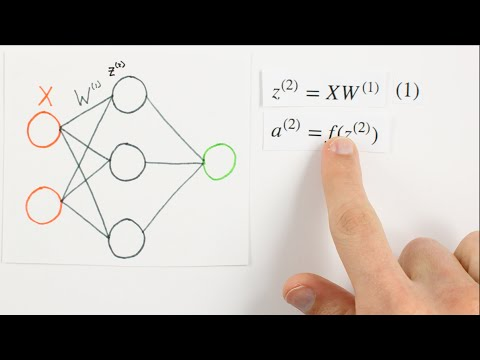

In [1]:
from IPython.display import YouTubeVideo
YouTubeVideo('UJwK6jAStmg')

<h3 align = 'center'> Variables </h3>

|Code Symbol | Math Symbol | Definition | Dimensions
| :-: | :-: | :-: | :-: |
|X|$$X$$|Input Data, each row in an example| (numExamples, inputLayerSize)|
|y |$$y$$|target data|(numExamples, outputLayerSize)|
|W1 | $$W^{(1)}$$ | Layer 1 weights | (inputLayerSize, hiddenLayerSize) |
|W2 | $$W^{(2)}$$ | Layer 2 weights | (hiddenLayerSize, outputLayerSize) |
|z2 | $$z^{(2)}$$ | Layer 2 activation | (numExamples, hiddenLayerSize) |
|a2 | $$a^{(2)}$$ | Layer 2 activity | (numExamples, hiddenLayerSize) |
|z3 | $$z^{(3)}$$ | Layer 3 activation | (numExamples, outputLayerSize) |

Last time, we setup our neural network on paper. This time, we’ll implement it in the programming language python. We’ll build our network as a python class and our init method will take care of instantiating important constants and variables. We’ll make these values accessible to the whole class by placing a self dot in front of each variable name.

Our network has 2 inputs, 3 hidden units, and 1 output. These are examples of hyperparameters. Hyperparameters are constants that establish the structure and behavior of a neural network, but are not updated as we train the network. Our learning algorithm is not capable of, for example, deciding that it needs another hidden unit, this is something that WE must decide on before training. What a neural network does learn are parameters, specifically the weights on the synapses.

We’ll take care of moving data through our network in a method called forward. Rather than pass inputs through the network one at a time, we’re going to use matrices to pass through multiple inputs at once. Doing this allows for big computational speedups, especially when using tools like MATLAB or Numpy. Our input data matrix, X, is of dimension 3 by 2, because we have 3, 2-dimensional examples. Our corresponding output data, y, is of dimension 3 by 1.

In [2]:
#Import code from last time
%pylab inline
from partOne import *

Populating the interactive namespace from numpy and matplotlib


ModuleNotFoundError: No module named 'partOne'

In [ ]:
print X.shape, y.shape

In [ ]:
class Neural_Network(object):
    def __init__(self):        
        #Define Hyperparameters
        self.inputLayerSize = 2
        self.outputLayerSize = 1
        self.hiddenLayerSize = 3
        
    def forward(self, X):
        #Propagate inputs though network

Each input value, or element in matrix X, needs to be multiplied by a corresponding weight and then added together with all the other results for each neuron. This is a complex operation, but if we take the three outputs we're looking for as a single row of a matrix, and place all our individual weights into a matrix of weights, we can create the exact behavior we need by multiplying our input data matrix by our weight matrix. Using matrix multiplication allows us to pass mulitple inputs through at once by simply adding rows to the matrix X. From here on out, we'll refer to these matrics as X, W one, and z two, where z two the activity of our second layer. Notice that each entry in z is a sum of weighted inputs to each hidden neuron. Z is of size 3 by 3, one row for each example, and one column for each hidden unit. 

We now have our first official formula, $z^{(2)} = XW^{(1)}$. Matrix notation is realy nice here, becuase it allows us to express the complex underlying process in a single line!

$$
z^{(2)} = XW^{(1)} \tag{1}\\
$$


Now that we have the activities for our second layer, z two, we need to apply the activation function. We'll independently apply the function to each entry in matrix z using a python method for this called sigmoid, because we’re using a sigmoid as our activation function. Using numpy is really nice here, because we can pass in a scalar, vector, or matrix, Numpy will apply the activation function element-wise, and return a result of the same dimension as it was given.

In [ ]:
def sigmoid(z):
    #Apply sigmoid activation function to scalar, vector, or matrix
    return 1/(1+np.exp(-z))

In [ ]:
testInput = np.arange(-6,6,0.01)
plot(testInput, sigmoid(testInput), linewidth= 2)
grid(1)

In [ ]:
sigmoid(1)

In [ ]:
sigmoid(np.array([-1,0,1]))

In [ ]:
sigmoid(np.random.randn(3,3))

 We now have our second formula for forward propogation, using f to denote our activation function, we can write that a two, our second layer activity, is equal to f of z two. a two will be a matrix of the same size as z two, 3 by 3.

$$
a^{(2)} = f(z^{(2)}) \tag{2}\\
$$

To finish forward propogation we need to propogate a two all the way to the output, yhat. We've already done the heavy lifting in the previous layer, so all we have to do now is multiply a two by our senond layer wieghts W2 and apply one more activation funcion. W2 will be of size 3x1, one weight for each synapse. Multiplying a2, a 3 by 3, by W2, a 3 by 1 results in a 3 by 1 matrix z three, the activity or our third layer. z3 has three activity values, one for each example. Last but not least, we'll apply our activation function to z three yeilding our official estimate of your test score, y Hat.  

$$
z^{(3)} = a^{(2)}W^{(2)} \tag{3}\\
$$
$$
\hat{y} = f(z^{(3)}) \tag{4}\\
$$

We need to implement our forward propogation formulas in python. First we'll initialize our weight matrices in our init method. For starting values, we'll use random numbers. 

We'll implement forward propogation in our forward method, using numpy's built in dot method for matrix multiplication and our own sigmoid method. 

In [ ]:
class Neural_Network(object):
    def __init__(self):        
        #Define Hyperparameters
        self.inputLayerSize = 2
        self.outputLayerSize = 1
        self.hiddenLayerSize = 3
        
        #Weights (parameters)
        self.W1 = np.random.randn(self.inputLayerSize, self.hiddenLayerSize)
        self.W2 = np.random.randn(self.hiddenLayerSize, self.outputLayerSize)
        
    def forward(self, X):
        #Propagate inputs though network
        self.z2 = np.dot(X, self.W1)
        self.a2 = self.sigmoid(self.z2)
        self.z3 = np.dot(self.a2, self.W2)
        yHat = self.sigmoid(self.z3) 
        return yHat
        
    def sigmoid(self, z):
        #Apply sigmoid activation function to scalar, vector, or matrix
        return 1/(1+np.exp(-z))

And there you have it, a python class capable of estimating your test score given how many hours you sleep and how many hours you study. We can pass in our input data and get real outputs. Now, you may be noticing that our estimates are quite terrible. That's because we have not yet trained our network, that's what we'll work on next time.